# Обучение с учителем: качество модели

## Описание проекта

Данный проект подразумевает под собой общий анализ компании «В один клик» и разработатку решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Цель проекта

Разработать модель для удержания постоянных клиентов.

## Описание данных

Данные содержат 4 Датафрейма с информацией о компании.

## План работы

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

In [1]:
from phik import resources, report
from phik.phik import phik_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import shap

## Загрузка данных

In [2]:
#анализируем 1 набор данных
filepath = r"C:\Users\erofe\Downloads\market_file.csv"
df_main = pd.read_csv(filepath, sep=',')
#ищем дубликаты
print(df_main.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_main.head(10))
#выводим информацию о таблице
print(df_main.info())

0
       id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819          

In [3]:
#Проверяем данные на неявные дубликаты
print(df_main['Покупательская активность'].unique())
print(df_main['Тип сервиса'].unique())
print(df_main['Разрешить сообщать'].unique())
print(df_main['Популярная_категория'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


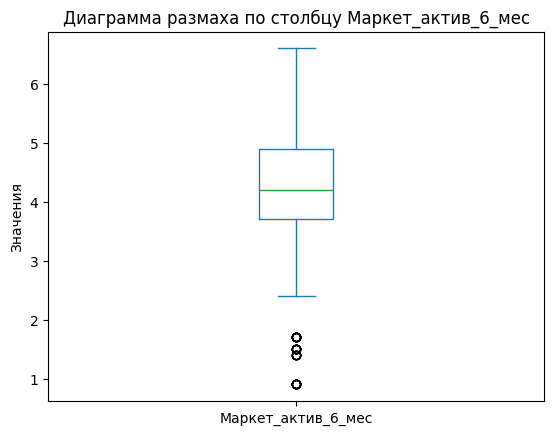

In [4]:
#строим диаграммы размаха для столбцов, где выбросы надо будет возможно удалять
df_main['Маркет_актив_6_мес'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Маркет_актив_6_мес', ylabel = 'Значения')
plt.show()

Выбросы разумны, удалять не стоит.

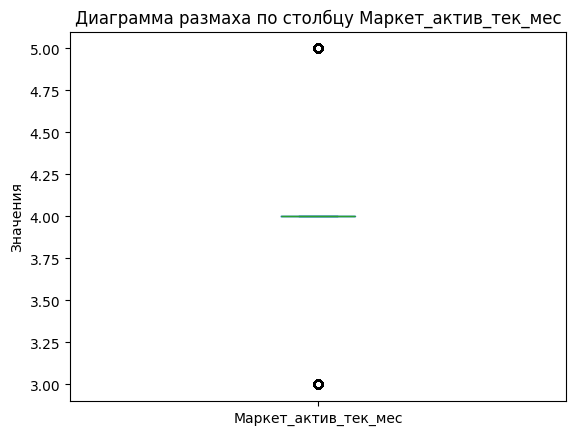

In [5]:
df_main['Маркет_актив_тек_мес'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Маркет_актив_тек_мес', ylabel = 'Значения')
plt.show()

Выбросы разумны, удалять не стоит.

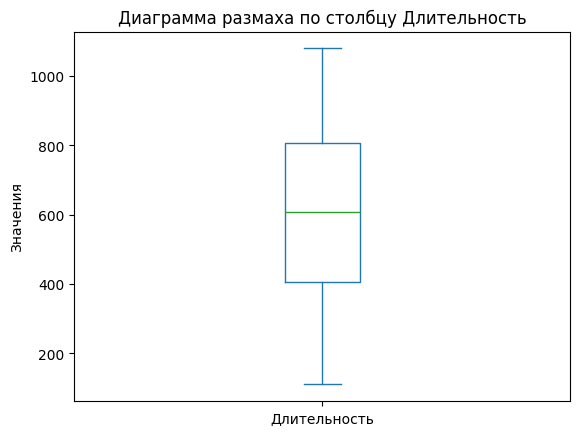

In [6]:
df_main['Длительность'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Длительность', ylabel = 'Значения')
plt.show()

Выбросов нет

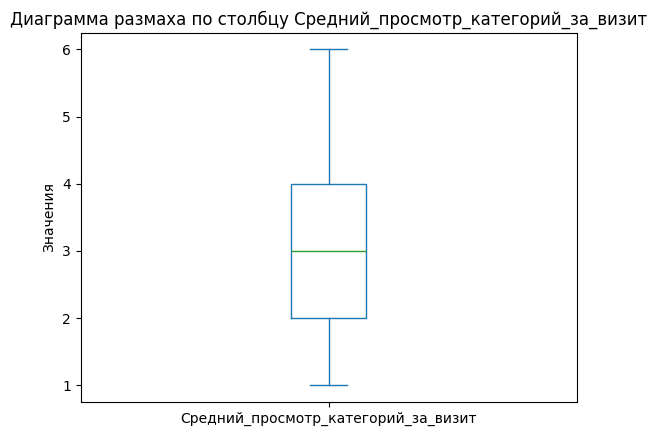

In [7]:
df_main['Средний_просмотр_категорий_за_визит'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Средний_просмотр_категорий_за_визит', ylabel = 'Значения')
plt.show()

Выбросов нет

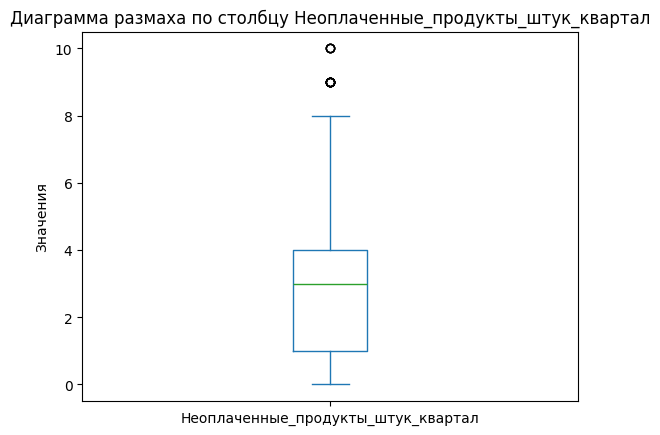

In [8]:
df_main['Неоплаченные_продукты_штук_квартал'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Неоплаченные_продукты_штук_квартал', ylabel = 'Значения')
plt.show()

Выбросы разумны, удалять не стоит.

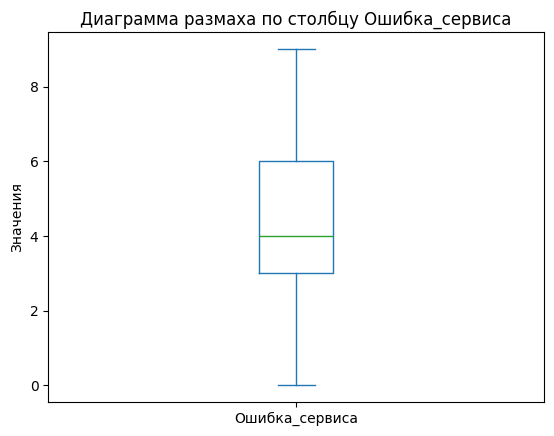

In [9]:
df_main['Ошибка_сервиса'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Ошибка_сервиса', ylabel = 'Значения')
plt.show()

Выбросов нет

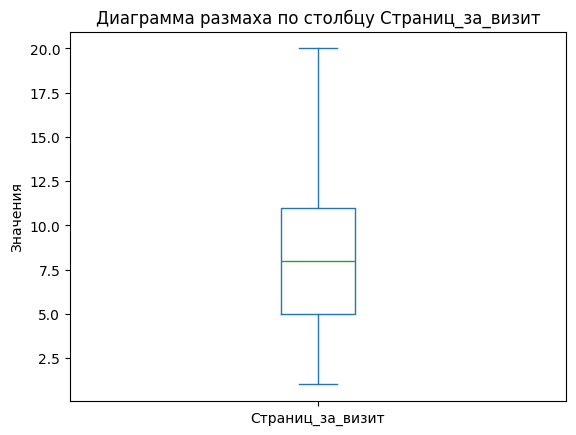

In [10]:
df_main['Страниц_за_визит'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Страниц_за_визит', ylabel = 'Значения')
plt.show()

Выбросов нет

С данными все отлично, кроме неявных дубликатов в столбце тип сервиса, что будет устранено

In [11]:
#анализируем 2 набор данных
filepath = r"C:\Users\erofe\Downloads\market_money.csv"
df_revenue = pd.read_csv(filepath, sep=',')
#ищем дубликаты
print(df_revenue.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_revenue.head(10))
#выводим информацию о таблице
print(df_revenue.info())

0
       id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [12]:
#Проверяем данные на неявные дубликаты
print(df_revenue['Период'].unique())

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


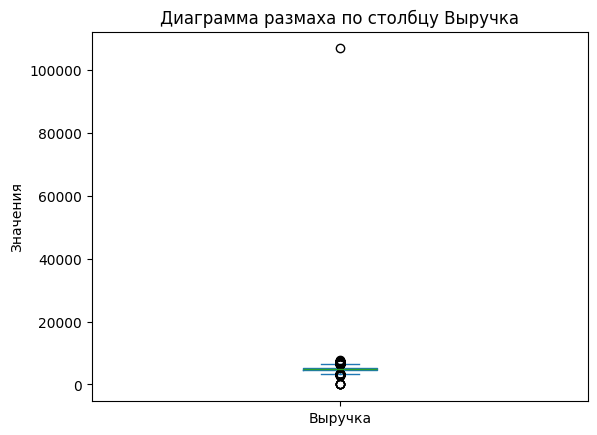

In [13]:
#строим диаграмму размаха
df_revenue['Выручка'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Выручка', ylabel = 'Значения')
plt.show()

В данных все отлично, кроме аномальных значений в выручке.

In [14]:
#анализируем 3 набор данных
filepath = r"C:\Users\erofe\Downloads\market_time.csv"
df_time = pd.read_csv(filepath, sep=',')
#ищем дубликаты
print(df_time.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_time.head(10))
#выводим информацию о таблице
print(df_time.info())

0
       id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


In [15]:
#Проверяем данные на неявные дубликаты
print(df_time['Период'].unique())

['текущий_месяц' 'предыдцщий_месяц']


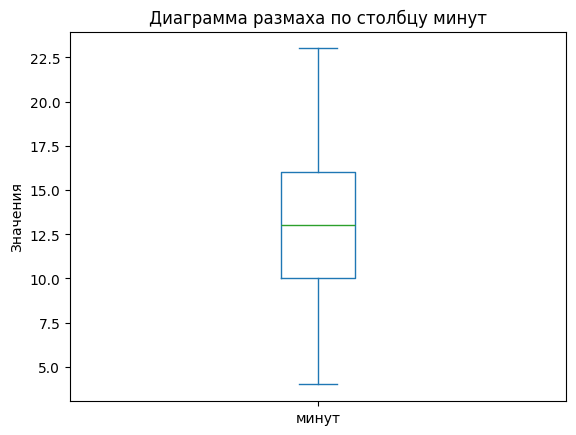

In [16]:
#строим диаграмму размаха
df_time['минут'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу минут', ylabel = 'Значения')
plt.show()

С данными все отлично, нет ничего, что требовало бы предобработки

In [17]:
#анализируем 4 набор данных
filepath = r"C:\Users\erofe\Downloads\money.csv"
df_money = pd.read_csv(filepath, sep=';')
#ищем дубликаты
print(df_money.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_money.head(10))
#выводим информацию о таблице
print(df_money.info())

0
       id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21
5  215353    3,95
6  215354    3,62
7  215355    5,26
8  215356    4,93
9  215357    4,66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None


Неправильный тип данных в столбце с прибылью, из-за этого так же не можем проверить на выбросы, остальные данные корректны.

Вывод: в 1 датафрейме были найдены неявные дубликаты, во 2 аномальные значение в числовом столбце и в 4 определен неправильный тип данных, все будет устранено в предобработке данных, в остальном с данными все хорошо.

##  Предобработка данных

In [18]:
#Удаляем неявные дубликаты
df_main['Тип сервиса'] = df_main['Тип сервиса'].str.replace('стандартт', 'стандарт')
df_time['Период'] = df_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
#Меняем тип данных
df_money['Прибыль'] = df_money['Прибыль'].str.replace(',', '.').astype('float')

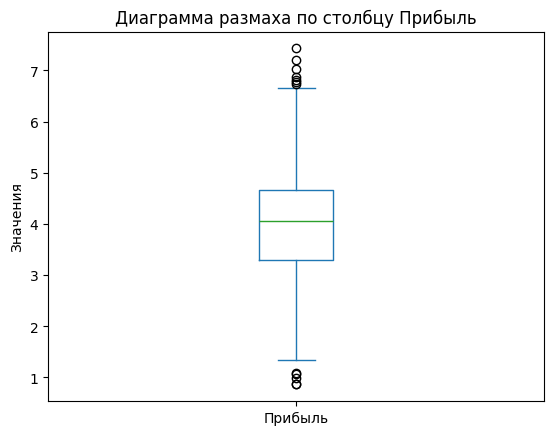

In [19]:
#строим диаграмму размаха
df_money['Прибыль'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Прибыль', ylabel = 'Значения')
plt.show()

Выбросы разумны, удалять не стоит.

In [20]:
#строим функцию для удаления аномальных значений
def remove_outliers(data, column_name, threshold=1.5):
    
    # Вычисляем квартили для столбца
    Q1 = data[column_name].quantile(0.00)
    Q3 = data[column_name].quantile(0.99)
    
    # Вычисляем IQR
    IQR = Q3 - Q1
    
    # Вычисляем границы для определения выбросов
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Удаляем выбросы
    data_cleaned = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    return data_cleaned

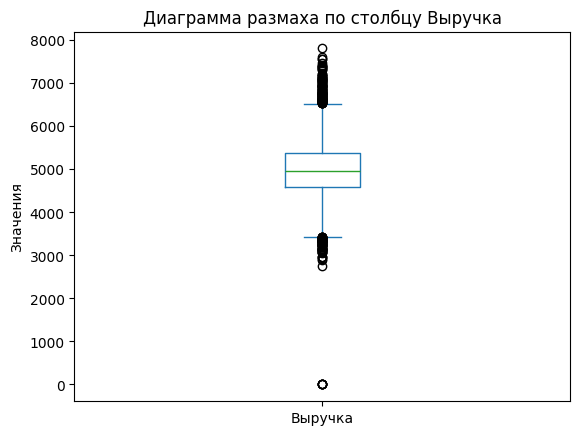

In [21]:
df_revenue = remove_outliers(df_revenue, 'Выручка')
#строим диаграмму размаха
df_revenue['Выручка'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Выручка', ylabel = 'Значения')
plt.show()

Вывод: в предобработке данных были удалены аномальные значения в столбце с выручкой, исправлены неявные дубликаты и изменён тип данных в столбце с прибылью.

## Исследовательский анализ данных

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

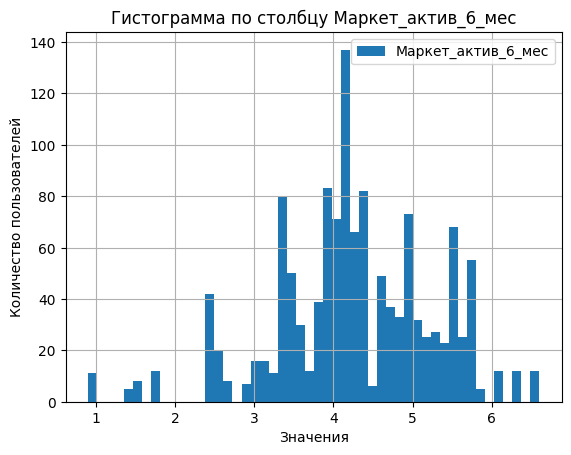

In [22]:
#Проводим анализ всех имеющихся признаков
df_main.plot(y = 'Маркет_актив_6_мес', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Маркет_актив_6_мес')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_main['Маркет_актив_6_мес'].describe()

Среднее значение - 4.25, самое популярное значение тоже около 4.25, распределение нормальное, хоть и может иногда резко взлетать и резко опускаться.

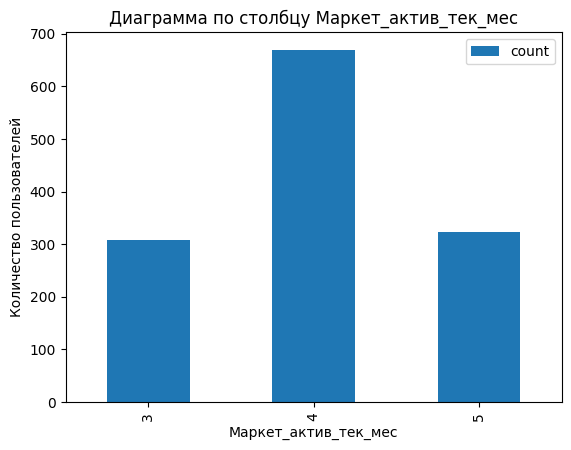

In [23]:
bar_sorted = df_main['Маркет_актив_тек_мес'].value_counts().reset_index()
bar_sorted.columns = ['Маркет_актив_тек_мес', 'count']
bar_sorted = bar_sorted.sort_values(by = 'Маркет_актив_тек_мес')
bar_sorted.plot(kind = 'bar', x = 'Маркет_актив_тек_мес', y = 'count', title = 'Диаграмма по столбцу Маркет_актив_тек_мес')
plt.xlabel('Маркет_актив_тек_мес')
plt.ylabel('Количество пользователей')
plt.show()

В данном столбце имеются всего 3 значения, и значение 4 явно преобладает, именно столько проводили маркетинговых коммуникаций в среднем в текущем месяце.

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

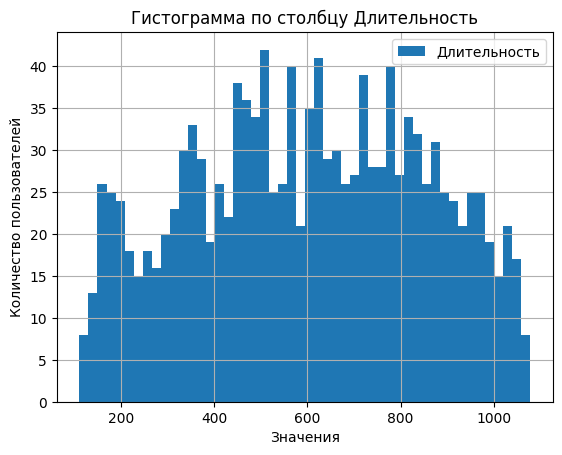

In [24]:
df_main.plot(y = 'Длительность', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Длительность')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_main['Длительность'].describe()

Среднее значение - 601.898462, самое популярное значение тоже около 500, распределение нормальное.

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

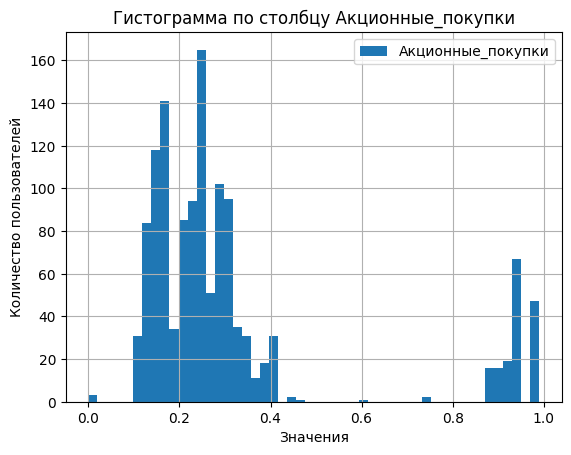

In [25]:
df_main.plot(y = 'Акционные_покупки', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Акционные_покупки')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_main['Акционные_покупки'].describe()

Люди явно распределены по 2 группам - первые(преобладающая) покупают товары вне зависимости от акций, вторые стараются покупать товары только по акциям. В среднем каждый 3 товар покупается по акции.

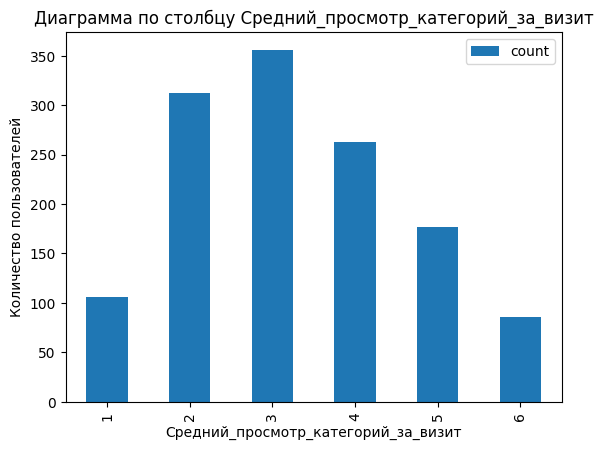

In [26]:
bar_sorted = df_main['Средний_просмотр_категорий_за_визит'].value_counts().reset_index()
bar_sorted.columns = ['Средний_просмотр_категорий_за_визит', 'count']
bar_sorted = bar_sorted.sort_values(by = 'Средний_просмотр_категорий_за_визит')
bar_sorted.plot(kind = 'bar', x = 'Средний_просмотр_категорий_за_визит', y = 'count', title = 'Диаграмма по столбцу Средний_просмотр_категорий_за_визит')
plt.xlabel('Средний_просмотр_категорий_за_визит')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение - 3.27000, самое популярное значение - 3, распределение нормальное.

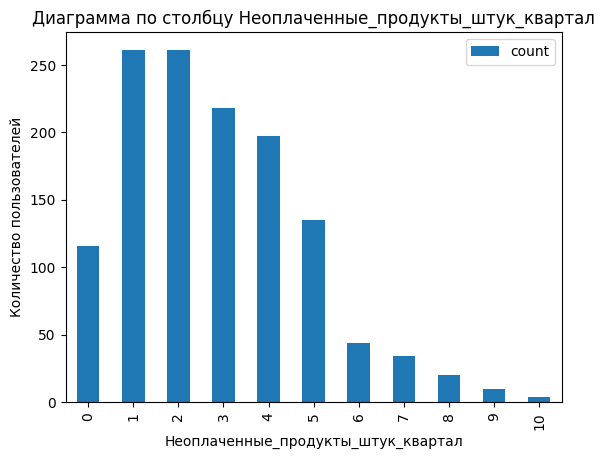

In [27]:
bar_sorted = df_main['Неоплаченные_продукты_штук_квартал'].value_counts().reset_index()
bar_sorted.columns = ['Неоплаченные_продукты_штук_квартал', 'count']
bar_sorted = bar_sorted.sort_values(by = 'Неоплаченные_продукты_штук_квартал')
bar_sorted.plot(kind = 'bar', x = 'Неоплаченные_продукты_штук_квартал', y = 'count', title = 'Диаграмма по столбцу Неоплаченные_продукты_штук_квартал')
plt.xlabel('Неоплаченные_продукты_штук_квартал')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение - 2.840000, самое популярное значение - 2, распределение нормальное.

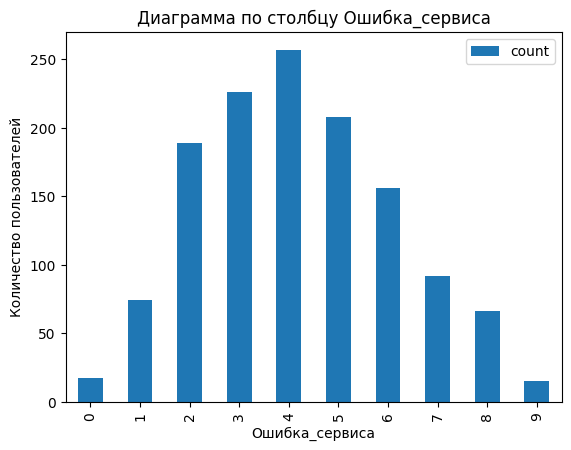

In [28]:
bar_sorted = df_main['Ошибка_сервиса'].value_counts().reset_index()
bar_sorted.columns = ['Ошибка_сервиса', 'count']
bar_sorted = bar_sorted.sort_values(by = 'Ошибка_сервиса')
bar_sorted.plot(kind = 'bar', x = 'Ошибка_сервиса', y = 'count', title = 'Диаграмма по столбцу Ошибка_сервиса')
plt.xlabel('Ошибка_сервиса')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение - 4.185385, самое популярное значение - 4, распределение нормальное.

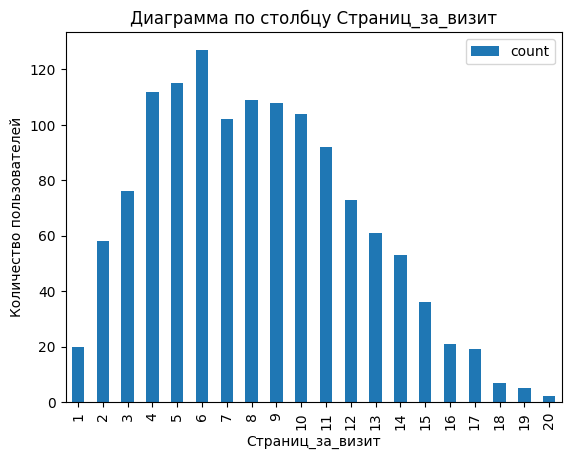

In [29]:
bar_sorted = df_main['Страниц_за_визит'].value_counts().reset_index()
bar_sorted.columns = ['Страниц_за_визит', 'count']
bar_sorted = bar_sorted.sort_values(by = 'Страниц_за_визит')
bar_sorted.plot(kind = 'bar', x = 'Страниц_за_визит', y = 'count', title = 'Диаграмма по столбцу Страниц_за_визит')
plt.xlabel('Страниц_за_визит')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение - 8.176923, самое популярное значение - 6, распределение нормальное.

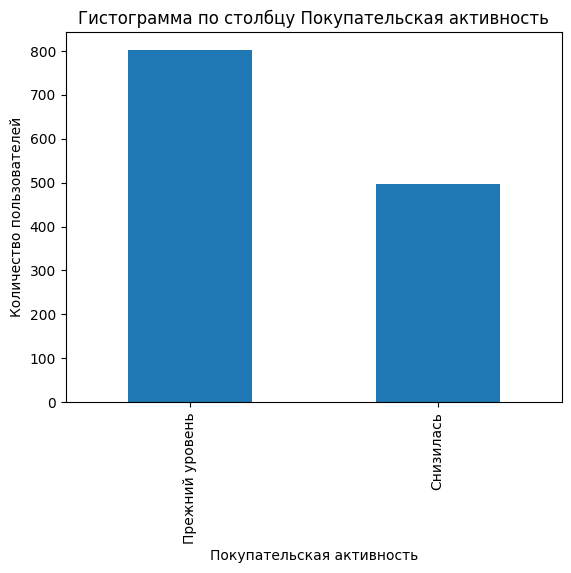

In [30]:
df_main['Покупательская активность'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Покупательская активность')
plt.xlabel('Покупательская активность')
plt.ylabel('Количество пользователей')
plt.show()

По графику видно, что большинство пользователей сохранили прежний уровень активности, но количество тех, у которых активность снизилась, велико.

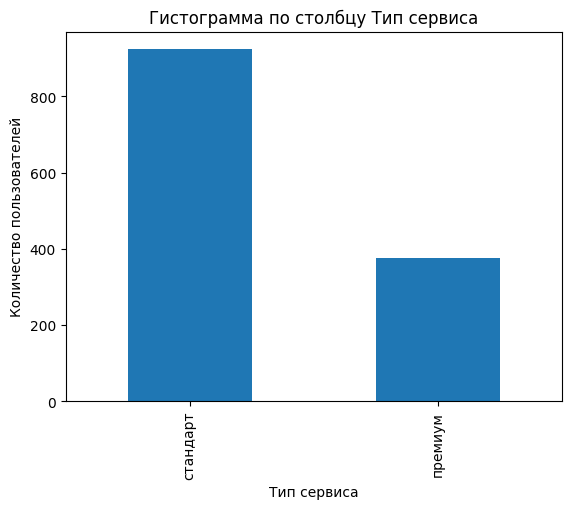

In [31]:
df_main['Тип сервиса'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Тип сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество пользователей')
plt.show()

Большинство людей предпочитают стандартный тип сервиса.

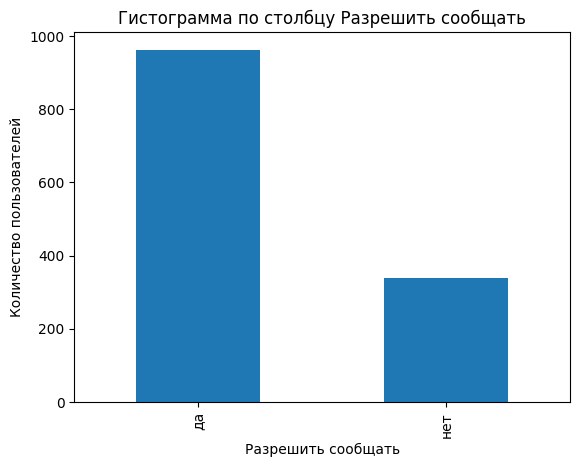

In [32]:
df_main['Разрешить сообщать'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Разрешить сообщать')
plt.xlabel('Разрешить сообщать')
plt.ylabel('Количество пользователей')
plt.show()

Подавляющее большинство пользователей согласны на получение предложений о товаре.

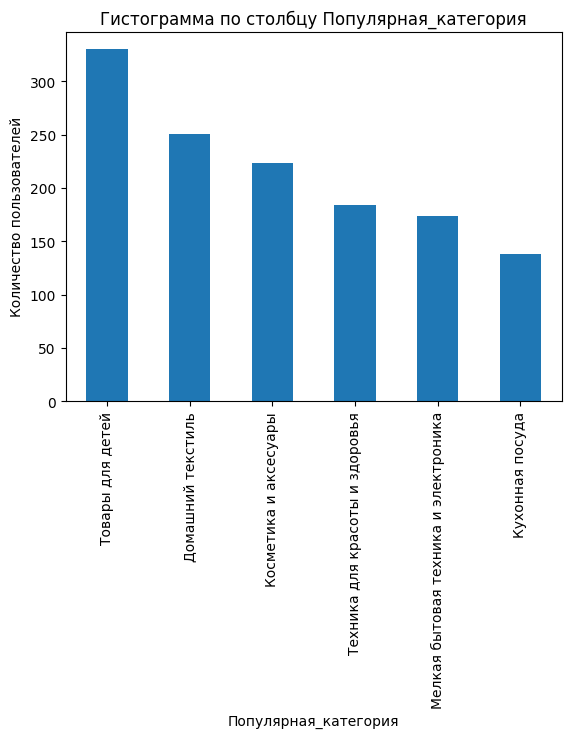

In [33]:
df_main['Популярная_категория'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Популярная_категория')
plt.xlabel('Популярная_категория')
plt.ylabel('Количество пользователей')
plt.show()

Больше всего на сайте покупают товары для детей, меньше всего кухонную посуду, значения остальных категорий примерно схожи(от 200 до 250)

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

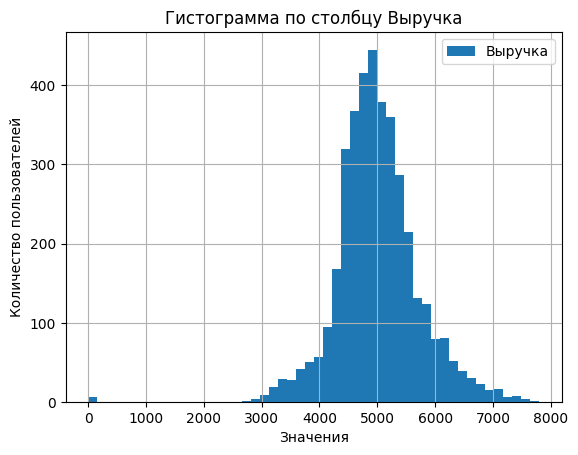

In [34]:
#Далее будем анализировать значения из остальных датафреймов, но не будем трогать периоды, так как количество значений там одинаково.
df_revenue.plot(y = 'Выручка', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Выручка')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_revenue['Выручка'].describe()

Самое популярное значение и среднее значение лежит около 5000, распределение нормальное, есть выбросы в нуле, с этим разберёмся чуть позже.

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

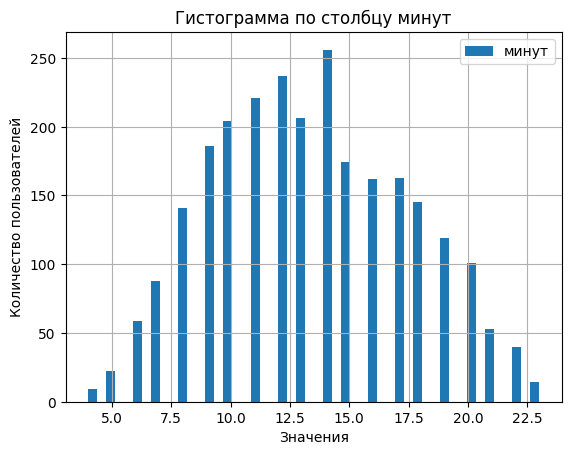

In [35]:
df_time.plot(y = 'минут', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу минут')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_time['минут'].describe()

Среднее значение - 13.336154, самое популярное значение - 14, распределение нормальное.

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

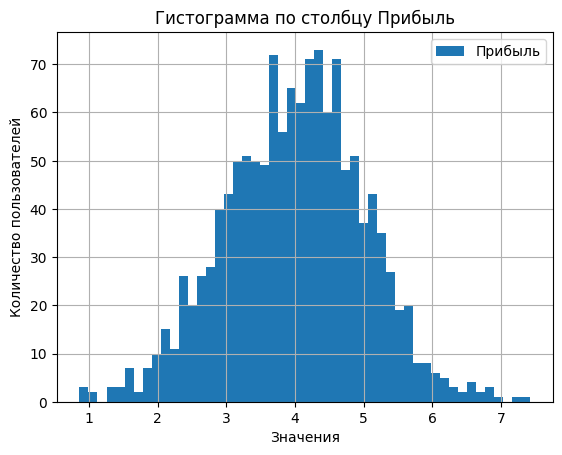

In [36]:
df_money.plot(y = 'Прибыль', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Прибыль')
plt.xlabel('Значения')
plt.ylabel('Количество пользователей')
df_money['Прибыль'].describe()

Среднее значение - 3.996631, самое популярное значение - 4.5, распределение нормальное.

In [37]:
# Группировка данных по 'id' и подсчет уникальных значений в столбце 'Период'
activity_counts = df_revenue.groupby('id')['Период'].nunique()

# Отбор клиентов с покупательской активностью не менее трех месяцев и выручкой больше 0
active_clients = activity_counts[activity_counts >= 3].index.tolist()

# Отфильтровать исходный DataFrame по отобранным клиентам и выручке больше 0
result_df = df_revenue[(df_revenue['id'].isin(active_clients)) & (df_revenue['Выручка'] > 0)]

# Удаление строк с id, которые повторяются менее 3 раз
filtered_df = result_df.groupby('id').filter(lambda x: len(x) >= 3)

# Изменение структуры таблицы
pivot_df = filtered_df.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum')
pivot_df.columns = ['Выручка_Период_пр', 'Выручка_Период_прпр', 'Выручка_Период_тек']

# Удаление строк с нулевыми значениями
pivot_df = pivot_df.dropna()

# Вывод информации о таблице после удаления строк
print (pivot_df)

# Изменение структуры таблицы
pivot_df1 = df_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum')
pivot_df1.columns = ['Минуты_Период_пр', 'Минуты_Период_тек']

# Удаление строк с нулевыми значениями
pivot_df1 = pivot_df1.dropna()

# Вывод информации о таблице после удаления строк
print (pivot_df1)

        Выручка_Период_пр  Выручка_Период_прпр  Выручка_Период_тек
id                                                                
215349             5216.0               4472.0              4971.6
215350             5457.5               4826.0              5058.4
215351             6158.0               4793.0              6610.4
215352             5807.5               4594.0              5872.5
215353             4738.5               5124.0              5388.5
...                   ...                  ...                 ...
216643             3664.0               4704.0              4741.7
216644             4729.0               5299.0              5353.0
216645             5160.0               5334.0              5139.2
216646             4923.0               4725.0              5224.6
216647             4720.0               5183.0              4448.3

[1296 rows x 3 columns]
        Минуты_Период_пр  Минуты_Период_тек
id                                         
215348          

Вывод: В данной части проекта мы провели исследовательский анализ данных со всеми признаками(выводы есть под графиками), и отобрали клиентов с покупательской активностью не менее трёх месяцев. Дополнительно сделали в таком же формате таблицу с временем проведенным на сайте.

## Объединение таблиц

In [38]:
# Делаем 1 датафрейм, чтобы индексами стали idб что попжет для обьединения
pivot_df2 = df_main.set_index('id')

merged_df = pd.concat([pivot_df, pivot_df1, pivot_df2], axis=1)
merged_df = merged_df.dropna()
merged_df = merged_df.drop_duplicates()
merged_df

,Выручка_Период_пр,Выручка_Период_прпр,Выручка_Период_тек,Минуты_Период_пр,Минуты_Период_тек,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,,,,,,
215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,5457.5,4826.0,5058.4,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,6158.0,4793.0,6610.4,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,4738.5,5124.0,5388.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,3664.0,4704.0,4741.7,14,7,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
216644,4729.0,5299.0,5353.0,12,11,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
216645,5160.0,5334.0,5139.2,12,18,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7


Вывод: В данной части работы мы обьединили 3 нужных нам датафрейма и создали дополнительные столбцы необходимые нам для будущего исследования

## Корреляционный анализ

In [39]:
#Строим матрицу phik
phik_matrix(merged_df)

interval columns not set, guessing: ['Выручка_Период_пр', 'Выручка_Период_прпр', 'Выручка_Период_тек', 'Минуты_Период_пр', 'Минуты_Период_тек', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']


,Выручка_Период_пр,Выручка_Период_прпр,Выручка_Период_тек,Минуты_Период_пр,Минуты_Период_тек,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
Выручка_Период_пр,1.000000,0.349432,0.836235,0.121588,0.194629,0.226593,0.000000,0.070651,0.154487,0.039146,0.126197,0.068102,0.255612,0.093034,0.254979,0.000000,0.151698
Выручка_Период_прпр,0.349432,1.000000,0.408802,0.420831,0.331502,0.504037,0.070929,0.000000,0.317007,0.000000,0.100854,0.229384,0.034144,0.175529,0.266501,0.130624,0.342443
Выручка_Период_тек,0.836235,0.408802,1.000000,0.229451,0.257059,0.204441,0.121546,0.063279,0.029225,0.000000,0.150456,0.072696,0.239981,0.091910,0.228112,0.000000,0.133399
Минуты_Период_пр,0.121588,0.420831,0.229451,1.000000,0.412731,0.698622,0.127577,0.025859,0.363556,0.104807,0.043705,0.261885,0.194627,0.162921,0.257706,0.242758,0.479297
Минуты_Период_тек,0.194629,0.331502,0.257059,0.412731,1.000000,0.583768,0.000000,0.000000,0.330387,0.057489,0.099370,0.252535,0.091034,0.183925,0.232648,0.174292,0.387779
Покупательская активность,0.226593,0.504037,0.204441,0.698622,0.583768,1.000000,0.139114,0.000000,0.554250,0.000000,0.099526,0.514311,0.309709,0.534135,0.510759,0.222186,0.759467
Тип сервиса,0.000000,0.070929,0.121546,0.127577,0.000000,0.139114,1.000000,0.288706,0.090970,0.044981,0.400534,0.022054,0.068511,0.189846,0.118516,0.070948,0.106996
Разрешить сообщать,0.070651,0.000000,0.063279,0.025859,0.000000,0.000000,0.288706,1.000000,0.000000,0.054328,0.249911,0.015069,0.071612,0.077975,0.197230,0.027044,0.056666
Маркет_актив_6_мес,0.154487,0.317007,0.029225,0.363556,0.330387,0.554250,0.090970,0.000000,1.000000,0.071319,0.000000,0.280692,0.147717,0.208711,0.287636,0.145466,0.394208
Маркет_актив_тек_мес,0.039146,0.000000,0.000000,0.104807,0.057489,0.000000,0.044981,0.054328,0.071319,1.000000,0.176144,0.000000,0.147500,0.233705,0.143744,0.112520,0.000000


Мультиколлинеарность мы наблюдаем только между столбцами с периодами выручки, но они содержат важную информацию, убирать их не будем, так же видно корреляцию между нашим целевым признаком и кол-вом посещенных столбцов за визит.

Вывод: В данной части работы мы построили матрицу корреляции phik и определили мультиколлинеарность и корреляцию нашего целевого признака.

## Использование пайплайнов

In [40]:
# Разделяем данные на признаки и целевую переменную
X = merged_df.drop(['Покупательская активность'], axis = 1)
y = merged_df['Покупательская активность']

# Определение количественных и категориальных признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Создание трансформатора для количественных данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Создание трансформатора для категориальных данных
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна предварительной обработки данных и поиска лучшей модели
# Для каждой модели добавим GridSearchCV для подбора гиперпараметра
models = {
    'KNeighborsClassifier': {'model': KNeighborsClassifier(), 'param_grid': {'classifier__n_neighbors': [3, 5, 7]}},
    'DecisionTreeClassifier': {'model': DecisionTreeClassifier(), 'param_grid': {'classifier__max_depth': [5, 10, 15]}},
    'LogisticRegression': {'model': LogisticRegression(), 'param_grid': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}},
    'SVC': {'model': SVC(probability=True), 'param_grid': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}}
}

results = {}

for model_name, config in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, config['param_grid'], cv=5, scoring='accuracy')
    
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Обучение GridSearchCV
    grid_search.fit(X_train, y_train)
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    
    # Вывод лучших параметров и лучшей модели
    print(f"{model_name}: Лучшие параметры - {grid_search.best_params_}")
    print(f"{model_name}: Лучшая модель - {grid_search.best_estimator_}")
    
    # Оценка точности на тестовом наборе данных
    y_pred = grid_search.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Точность на тестовом наборе данных - {accuracy}\n")
    print(f"{model_name}: roc-auc на тестовом наборе данных - {roc_auc}\n")
    
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_model': grid_search.best_estimator_,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }

KNeighborsClassifier: Лучшие параметры - {'classifier__n_neighbors': 7}
KNeighborsClassifier: Лучшая модель - Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Выручка_Период_пр', 'Выручка_Период_прпр', 'Выручка_Период_тек',
       'Минуты_Период_пр', 'Минуты_Период_тек', 'Маркет_актив_6_мес',
       'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
       'Средний_просмотр...
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')),
                                                 ('cat',
           

В данном случае нам стоит использовать ROC-AUC, так как ROC-AUC оценивает способность модели различать между классами (активные и неактивные клиенты) в различных точках отсечения вероятности. Для его вычисления будем использовать нашу лучшую модель SVC.

Вывод: В данной части работы мы построили пайплайны и выявили необходимые параметры для построения модели, так же выбрали необходимую метрику для дальнейшей работы - ROC-AUC

## Анализ важности признаков

PermutationExplainer explainer: 258it [00:53,  4.22it/s]                                                               


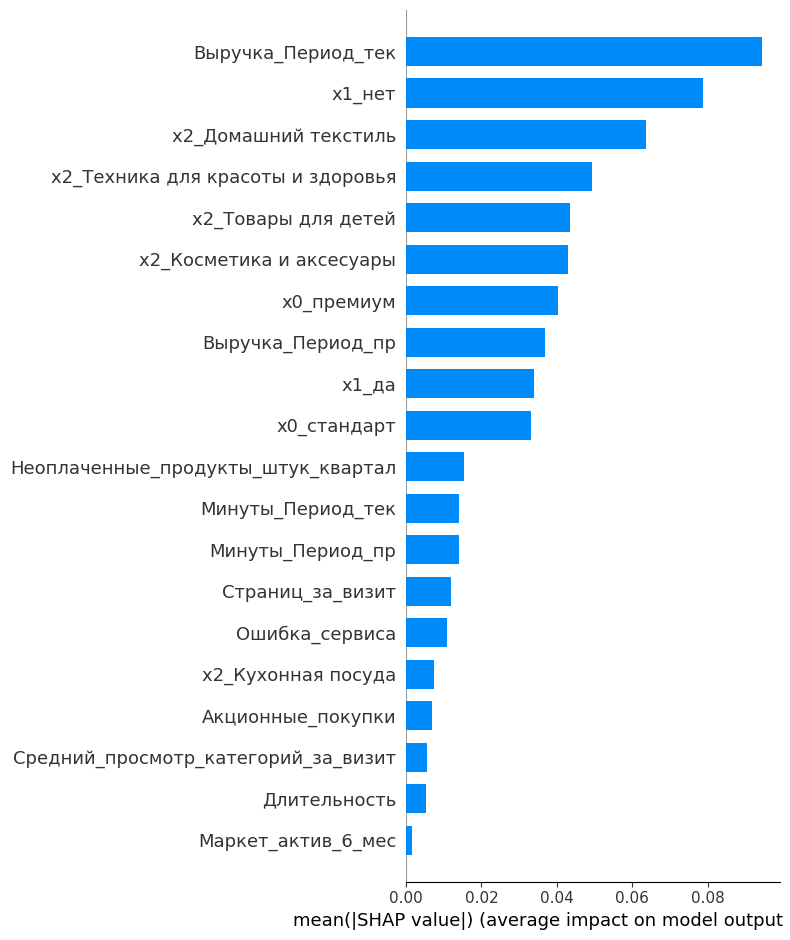

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Замените это на ваш пайплайн
best_model = results['SVC']['best_model']
svc_model = best_model.named_steps['classifier']


X_train = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test_tr = best_model.named_steps['preprocessor'].transform(X_test)

explainer = shap.Explainer(svc_model.predict_proba, X_train)
shap_values = explainer(X_test_tr)

# Достаем из ColumnTransformer названия OHE признаков
# и объединяем их с назвниями численных признаков
# в том порядке котором они подавались в pipeline
features_out = best_model.named_steps['preprocessor'].transformers_[1][1][1].get_feature_names_out().tolist() + numeric_features.tolist()

shap.summary_plot(shap_values[:, :, 1], X_test_tr, plot_type="bar",
feature_names=features_out)

Вывод: В этой части работы мы построили график анализа важности признаков и выяснили:
1. Самый важный признак, влиящий на целевой - выручка в текущий период. Так же покупательская активность сильно зависит от любимой категории продукции.
2. Самыми неывжными признакмами являются Маркетинговая активность за 6 месяцев, длительность нахождения на сайте и средний просмотр категорий за визит, что логично, ведь эти признаки слабо связаны с покупательской активностью.
3. При моедлировании и принятии бизнес-решений, надо фокусироваться на ключевых признаках, которые более значимы для модели.

## Шаг 8. Сегментация покупателей

In [42]:
svc_model.fit(X_train, y_train)
# добавление предсказаний к данным и сегментация
X_test['Покупательская активность_будущее'] = svc_model.predict_proba(X_test_tr)[:, 1] 
pivot_df2 = df_money.set_index('id')
df_final = pd.concat([pivot_df2, X_test], axis=1)
df_final = df_final.dropna()
df_segmented = df_final[df_final['Покупательская активность_будущее'] > 0.6]
df_segmented = df_segmented[df_segmented['Прибыль'] > 4]
df_segmented

,Прибыль,Выручка_Период_пр,Выручка_Период_прпр,Выручка_Период_тек,Минуты_Период_пр,Минуты_Период_тек,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Покупательская активность_будущее
id,,,,,,,,,,,,,,,,,,
215361,4.03,6400.0,4597.0,3789.7,11.0,13.0,стандарт,да,5.1,4.0,199.0,0.23,Техника для красоты и здоровья,4.0,5.0,2.0,3.0,0.829978
215374,4.08,5762.5,4666.0,5720.9,11.0,8.0,стандарт,нет,2.9,5.0,268.0,0.98,Домашний текстиль,6.0,3.0,2.0,2.0,0.962922
215383,4.27,5560.0,4729.0,5989.0,7.0,10.0,стандарт,да,2.7,4.0,504.0,0.33,Техника для красоты и здоровья,2.0,4.0,2.0,4.0,0.937083
215384,4.78,3584.0,4226.0,4010.4,11.0,12.0,стандарт,да,4.0,4.0,1020.0,0.34,Косметика и аксесуары,2.0,3.0,8.0,3.0,0.874389
215396,5.09,5876.0,4805.0,6830.2,12.0,6.0,стандарт,да,3.4,5.0,706.0,0.22,Домашний текстиль,2.0,3.0,8.0,4.0,0.847063
215400,6.73,5681.0,4439.0,5691.4,11.0,9.0,стандарт,нет,4.4,5.0,304.0,0.94,Товары для детей,1.0,4.0,3.0,2.0,0.988616
215401,7.43,5548.5,4833.0,6065.9,10.0,8.0,премиум,да,3.4,5.0,339.0,0.30,Косметика и аксесуары,2.0,3.0,3.0,4.0,0.937936
215406,5.00,5715.5,4763.0,6257.6,6.0,6.0,стандарт,да,2.4,5.0,511.0,0.30,Товары для детей,3.0,2.0,4.0,6.0,0.943661
215410,4.46,4839.0,4248.0,4607.6,6.0,4.0,стандарт,да,3.0,3.0,1048.0,0.89,Товары для детей,4.0,5.0,3.0,1.0,0.999991


Возьмём покупателей, которые приносят большую прибыль(выше среднего значения) и вероятнее всего, снизят покупательскую активность(значение модели больше 0.6), ведь они важнее всего для бизнеса.

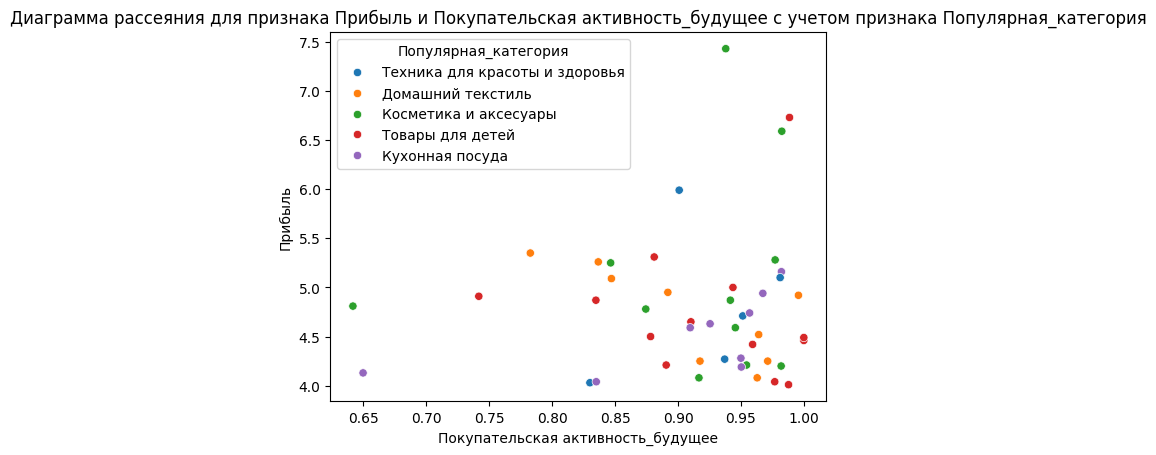

In [43]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Прибыль'], hue=df_segmented['Популярная_категория'])
plt.title('Диаграмма рассеяния для признака Прибыль и Покупательская активность_будущее с учетом признака Популярная_категория')
plt.show()

Зависимости с какой-то из популярных категорий не наблюдается.

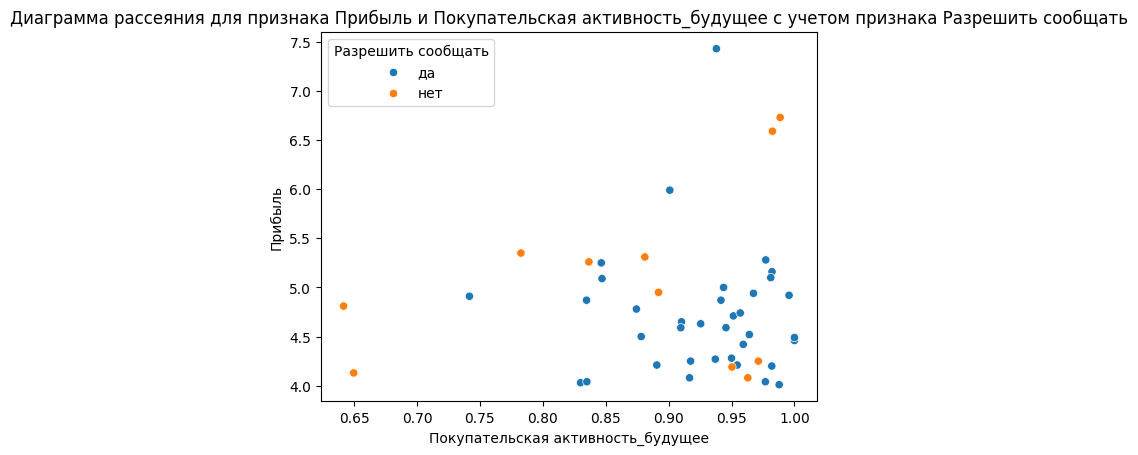

In [44]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Прибыль'], hue=df_segmented['Разрешить сообщать'])
plt.title('Диаграмма рассеяния для признака Прибыль и Покупательская активность_будущее с учетом признака Разрешить сообщать')
plt.show()

Систему рассылок надо пересмотреть, ведь их работа, явно не спасает людей от снижения покупательской активности, ведь в нашей выборке людей с включеннными рассылками больше, как и вероятность снижения их покупательской активности.

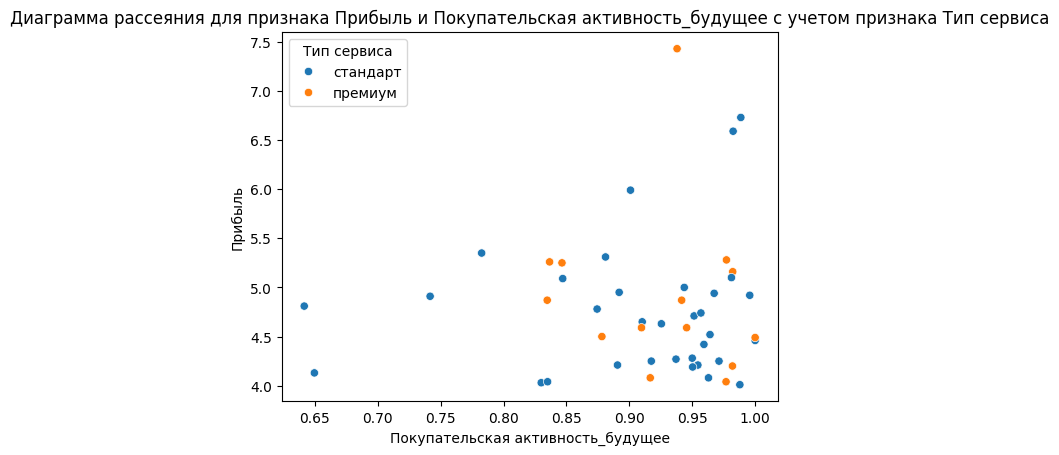

In [45]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Прибыль'], hue=df_segmented['Тип сервиса'])
plt.title('Диаграмма рассеяния для признака Прибыль и Покупательская активность_будущее с учетом признака Тип сервиса')
plt.show()

Зависимости с каким - то из типов сервиса не наблюдается, но в нашей выборке явно больше стандартных пользователей, надо переманивать большее количество пользователей на премиум сервис, тогда бизнес будет функционировать лучше.

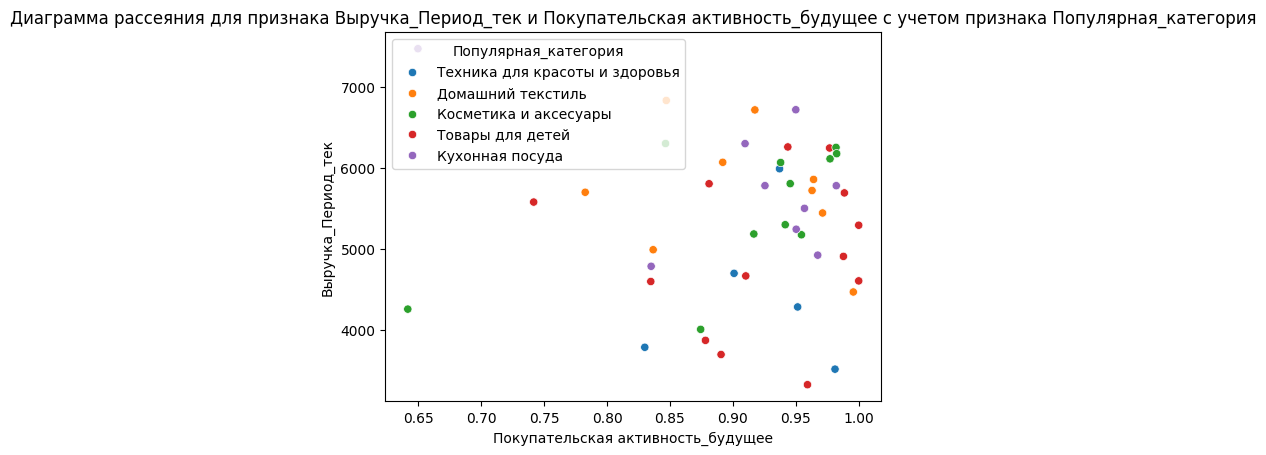

In [46]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Выручка_Период_тек'], hue=df_segmented['Популярная_категория'])
plt.title('Диаграмма рассеяния для признака Выручка_Период_тек и Покупательская активность_будущее с учетом признака Популярная_категория')
plt.show()

Зависимости не наблюдается.

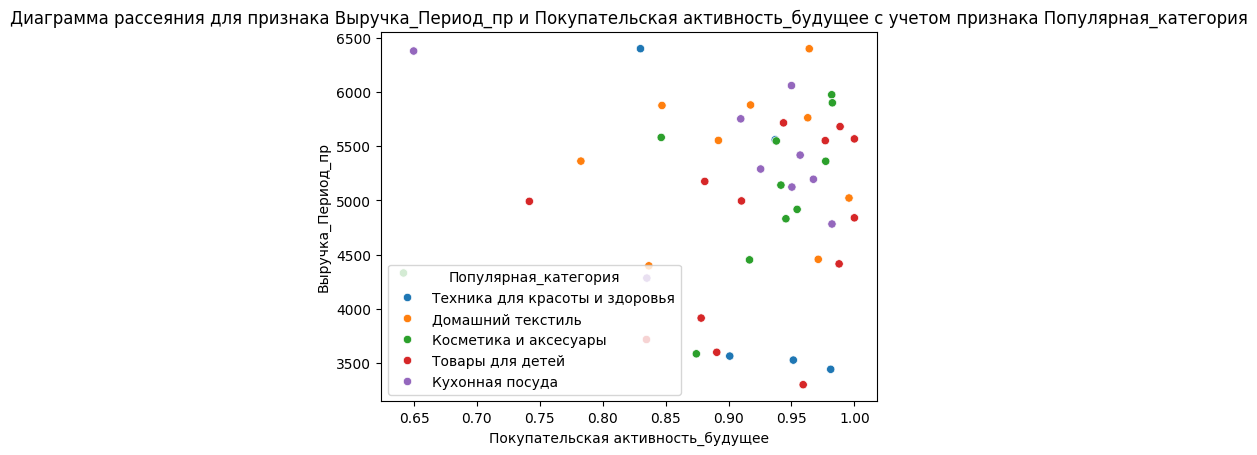

In [47]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Выручка_Период_пр'], hue=df_segmented['Популярная_категория'])
plt.title('Диаграмма рассеяния для признака Выручка_Период_пр и Покупательская активность_будущее с учетом признака Популярная_категория')
plt.show()

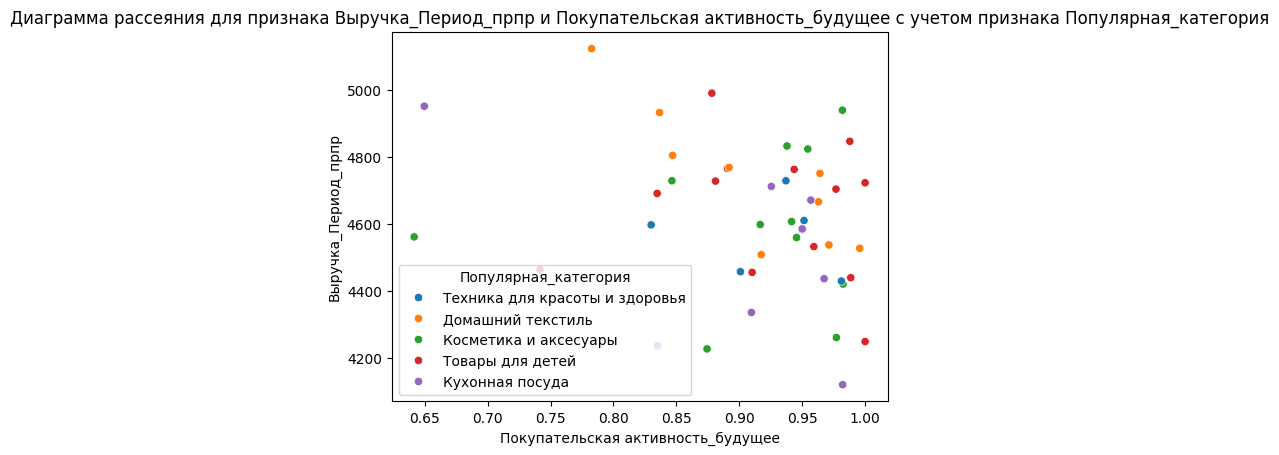

In [48]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Выручка_Период_прпр'], hue=df_segmented['Популярная_категория'])
plt.title('Диаграмма рассеяния для признака Выручка_Период_прпр и Покупательская активность_будущее с учетом признака Популярная_категория')
plt.show()

По 3 последним графикам видно, что выручка от этих клиентов подросла от предыдущего до текущего периода, возможно будущее падение связано со слишком маленьким ассортиментом товара(из - за чего данным клиентам наскучил магазин), возможно стоит делать специальные предложения для постоянных, прибыльных клиентов и это поможет компании. Так же по данным графикам видно, что продажи техники на долгосрочную эксплуатацию приносит с годами все меньше и меньше выручки, в разрезе с остальными значениями. Данная проблема решается специализированными предложениями для клиентов, которые уже купили товар в долгий срок эксплуатации. Надо точечно предлагать им расходуемые материалы, на основе их интересов.

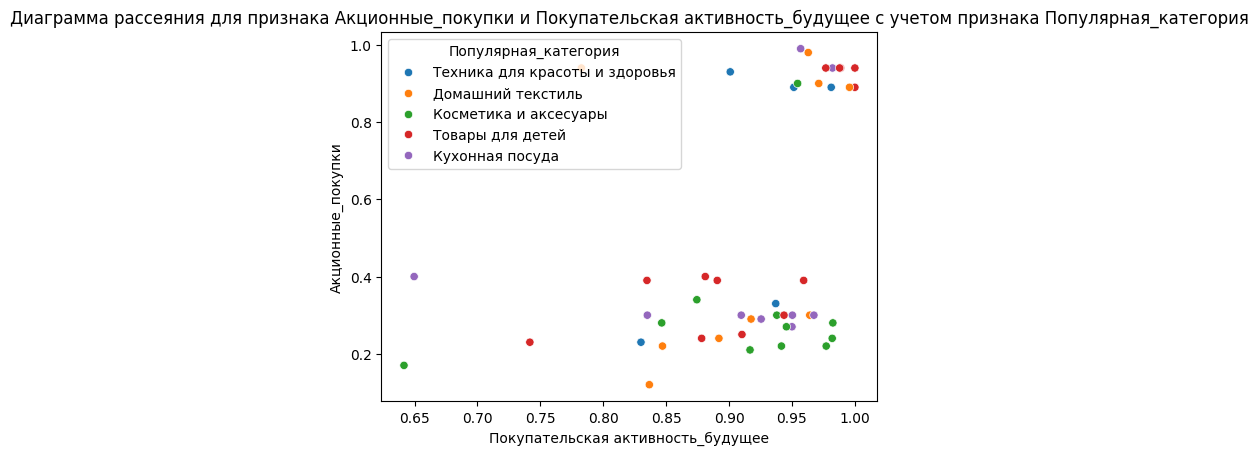

In [49]:
sns.scatterplot(x=df_segmented['Покупательская активность_будущее'], y=df_segmented['Акционные_покупки'], hue=df_segmented['Популярная_категория'])
plt.title('Диаграмма рассеяния для признака Акционные_покупки и Покупательская активность_будущее с учетом признака Популярная_категория')
plt.show()

Зависимости не наблюдается. Есть люди, которые покупают только по акциям, есть и простые покупатели. Если смотреть по признакам, то люди покупающие по акции, в основном, покупают расходники(товары для детей и кухонная посуда), поэтому стоит продлить на них акции. Так же это может привлечь остальных людей, покупать эти товары, ведь те, кто покупают не по акциям расходники, тоже имеют большой вес в нашем сегменте.

Вывод: Взял я сегмент, со снижающейся покупательской активностью и высокой прибыльностью. Я думаю, что для увеличения покупательской активности, стоит подготовить особые предложения для постоянных, прибыльных клиентов, чтобы персонализировать продажи. Так же переманивать большее количество пользователей на премиум сервис, тогда бизнес будет функционировать лучше. Систему рассылок надо пересмотреть, ведь их работа, явно не спасает людей от снижения покупательской активности. Так же стоит ввести специализированные предложения для клиентов, которые приобретали товар долгой эксплуатации. Ввести небольшие доработки в акциях на товары, тоже не будет лишним.

## Общий вывод

Задача:
Задачей данного проекта было разработатка модели для удержания постоянных клиентов..

Исходные данные и предобработка:
Исходные данные включали в себя описание данных, типы признаков, размер выборки. Перед обучением моделей была проведена тщательная предобработка, включая заполнение пропущенных значений, кодирование категориальных признаков, масштабирование и т.д..

Поиск лучшей модели:
Для поиска лучшей модели был проведено использование кросс-валидации, сравнение метрик качества моделей и выбор оптимальной. Применены такие алгоритмы, как логистическая регрессия, случайный лес и т.д.

Лучшая модель:
После тщательного анализа была выбрана модель svc_model, так как она показала наилучшую точность.

Выводы и рекомендации:
В результате выполнения проекта были определены ключевые признаки, влияющие на целевую переменную. На основе этого можно рекомендовать подготовить особые предложения для каждой популярной категории, чтобы персонализировать продажи.

Дополнительные предложения:
В дополнение к основным результатам, стоит рассмотреть изменение подхода к рассылкам, ведь в нашей выборке людей с включеннными рассылками больше, как и вероятность снижения их покупательской активности, это стоит изменить. Так же переманивать большее количество пользователей на премиум сервис.  Это может улучшить общий результат и внести дополнительные позитивные изменения в бизнес-процессы. Так же стоит ввести специализированные предложения для клиентов, которые приобретали товар долгой эксплуатации, для продажи им менее долгосрочного товара. Так же стоит продлить акции на расходуемые товары, для стимулирования продаж.